<a href="https://www.kaggle.com/code/sonalanand/netflix-titles-practise-01?scriptVersionId=220500341" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os

# List all files and folders in /kaggle/input
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-titles-dataset-for-visualization-practise/netflix_titles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Correct file path based on the output
file_path = "/kaggle/input/netflix-titles-dataset-for-visualization-practise/netflix_titles.csv"

# Load the CSV file
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the file path.")

Dataset loaded successfully.
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   


Day 1 :


1. Convert and Extract Date Components--->
•	Convert the date_added column to datetime format.
•	Extract Year, Month, and Day into new columns: added_year, added_month, and added_day.



  2. Handle Missing Data--->
•	Check for missing values in key columns (director, cast, country).

•	Replace:
o	director: Replace missing values with "Unknown".
o	country: Replace missing values with "Not Specif







ied".
3. Categorise Duration--->
•	Add a new column, duration_ca
tegory:
o	For Movies, categorise duration as:
	"Short" (<= mintes),
	"Medium" (91-minutes),
	"Long" (
>minnutes

o	For TV Shows, use the number of seasons to categorise:
	"Mini-Series" (1 season),
	"Series" (2-3 seasons),
	"Long Series" (>



= 4 seasons).
4. Analyse
 Release Years
•	Plot the number of titles released per year (group by r

5lease_year).


5. Scatter Plot
•	Create a scatter plot comparing the number of titles by release_year for type categories (MovMoies vs TV Shows).


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
for x in df.columns:
    print(x)

show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object




1. Convert and Extract Date Components--->
•	Convert the date_added column to datetime format.
•	Extract Year, Month, and Day into new columns: added_year, added_month, and added_day.







In [7]:


print(df['date_added'].unique())  # checking for unique values if any since was facing issue in converting to datetime format



['September 25, 2021' 'September 24, 2021' 'September 23, 2021' ...
 'December 6, 2018' 'March 9, 2016' 'January 11, 2020']


In [8]:


df['date_added'] = df['date_added'].astype(str)       # converting to string before we apply pd.to_datetime.



In [9]:


df['date_added'] = df['date_added'].str.strip()        # removing white space from datetime column to remove any in-consistency.



In [10]:


df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')    # converting to datetime format.


# we used error = 'coerce' so that missing values turn to NaT automatically.

In [11]:



df['added_year'] = df['date_added'].dt.year           # extracting year
df['added_month'] = df['date_added'].dt.month         # extracting month
df['added_day'] = df['date_added'].dt.day             # extracting day





In [12]:



df['added_year'] = df['added_year'].fillna(0).astype(int)
df['added_month'] = df['added_month'].fillna(0).astype(int)         # converted new columns to int from float.
df['added_day'] = df['added_day'].fillna(0).astype(int)




  2. Handle Missing Data--->
•	Check for missing values in key columns (director, cast, country).

•	Replace:
o	director: Replace missing values with "Unknown".
o	country: Replace missing values with "Not Specified".

In [13]:
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Not Specified')

3. Categorise Duration--->
•	Add a new column, duration_category:

o	For Movies, categorise duration as:
	"Short" (90<= mintes),
	"Medium" (91-minutes),
	"Long" (150>minnutes

o	For TV Shows, use the number of seasons to categorise:
	"Mini Series" (1 season),
	"Medium Series" (2-3 seasons),
	"Long Series" (>= 4 seasons).

In [14]:



df['duration'] = df['duration'].astype(str)   
# ensuring it is in "string" before we start working on this column.

In [15]:
df['duration'] = df['duration'].str.replace(' min','', regex = True)         # cleaning Movie data in Duration column.

In [16]:
df['duration'] = df['duration'].str.replace(' Season','',regex = True).str.replace('s','',regex = True)   # cleaning Tv-show data in Duration column.

In [17]:
df['duration'] = pd.to_numeric(df['duration'], errors = 'coerce')    # converting the duration column to numeric.

In [18]:
df['duration_category'] = df['duration'].astype(object)   # converting to string before below action to avoid 'd-type' error.

In [19]:
df.loc[df['type'] == 'Movie','duration_category'] = df.loc[df['type'] == 
'Movie','duration'].apply(lambda x : 'Short-Movie' if x <= 90 else 'Medium-Movie' if 90 < x <= 150 else 'Long-Movie')   



# for movies only using loc.

In [20]:
df.loc[df['type'] == 'TV Show','duration_category'] = df.loc[df['type'] == 
'TV Show','duration'].apply(lambda x : 'Mini-Series' if x == 1 else 'Medium-Series' if 2 <= x <= 3 else 'Long-Series')




# for tv show only using loc.

4. Analyse Release Years

•	Plot the number of titles released per year (group by release_year).

In [21]:
release_year_count = df['release_year'].value_counts().sort_index()
release_year_count

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

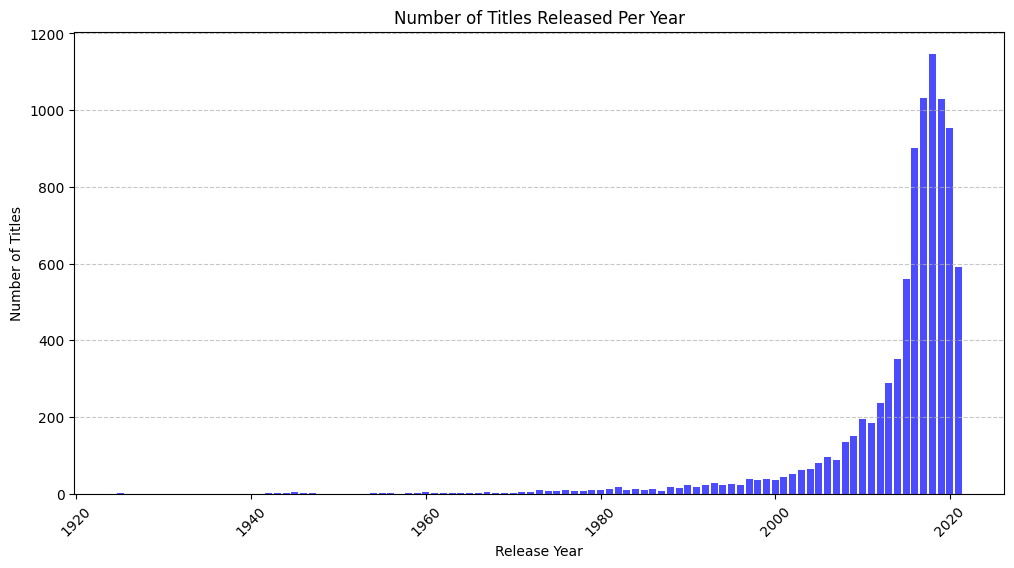

In [22]:
plt.figure(figsize = (12,6))


plt.bar(release_year_count.index, release_year_count.values, color='blue', alpha=0.7)


plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Released Per Year')


plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

In [23]:
# Approach 2nd using sns.barplot ---->


release_year_value = df['release_year'].value_counts().sort_index().reset_index()
release_year_value.columns = ['Release Year','Count']


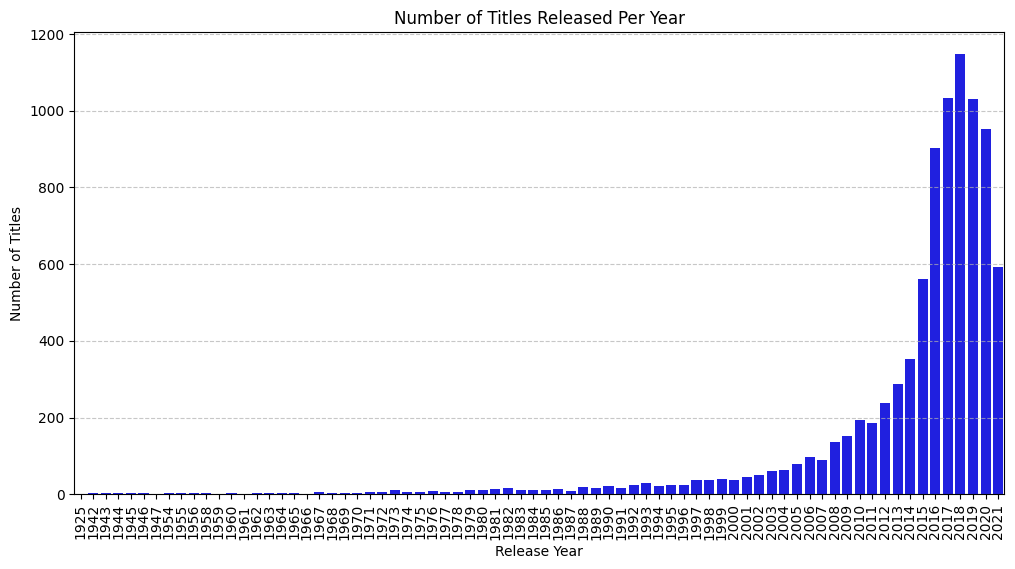

In [24]:
plt.figure(figsize = (12,6))


sns.barplot(data = release_year_value, x = 'Release Year', y = 'Count', color = 'blue')


plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Released Per Year')


plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

5. Scatter Plot

•	Create a scatter plot comparing the number of titles by release_year for type categories (Movies vs TV Shows).

In [25]:
release_year_counts = df[['release_year','type']].value_counts().reset_index()
release_year_counts.columns = ['Release Year','type','count']

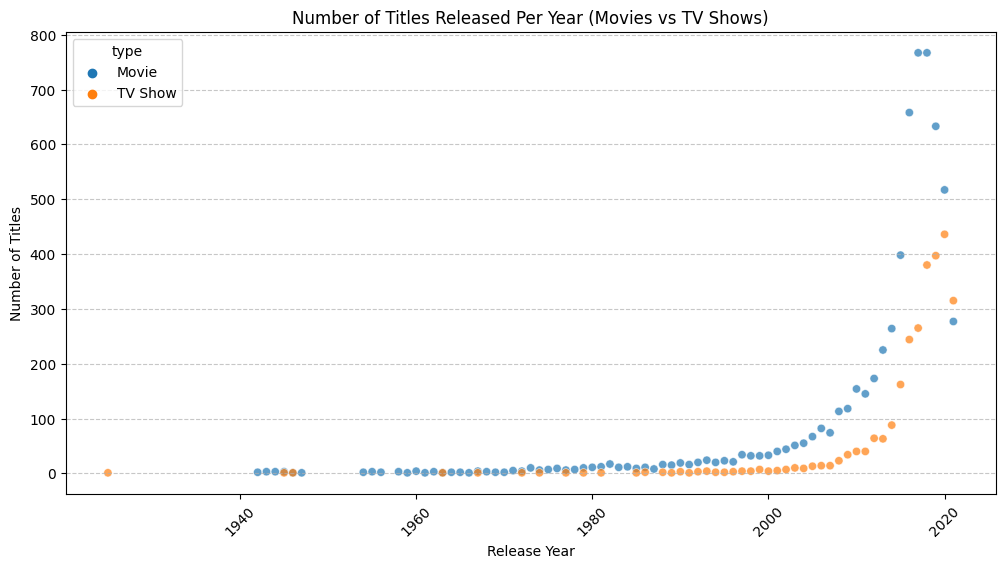

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=release_year_counts, x='Release Year', y='count', hue='type', alpha=0.7)


plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Released Per Year (Movies vs TV Shows)')



plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()

In [27]:
# approach 2nd using------->   group-by


release_year_count = df.groupby(['release_year','type']).size().reset_index(name = 'count')

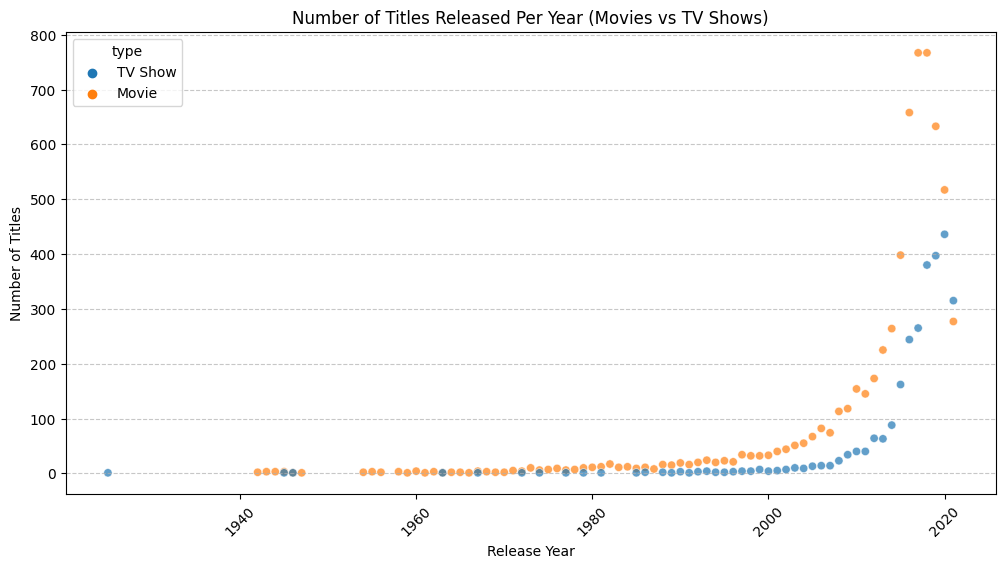

In [28]:
plt.figure(figsize=(12, 6))


sns.scatterplot(data=release_year_count, x='release_year', y='count', hue='type', alpha=0.7)


plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Released Per Year (Movies vs TV Shows)')


plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()
